In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#섭씨온도(인풋데이터)를 닫아 화씨온도로 출력
def c_to_f(c):
    return c*1.8+32

In [3]:
input_c=int(input("섭씨온도는?"))
print("화씨온도",c_to_f(input_c))

섭씨온도는?11
화씨온도 51.8


# 2.머신러닝 프로그램 방식
- 1.데이터 확보 및 생성
- 2.데이터 전처리:훈련데이터셋(학습데이터셋),검증데이터셋,시험데이터셋
- 3.모델 구성
- 4.모델 학습과정 설정
- 5.모델 학습시키기
- 6.모델 평가(시험데이터셋으로)
- 7.모델 사용(입력값을 주어지면 예측값을 받기)

# 2.1 노이즈가 없는 데이터로 실습

In [4]:
#1.데이터 생성
data_c=np.array(range(100))
data_c #독립변수

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
data_d=c_to_f(data_c)
data_d #타겟변수

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [6]:
# 3.모델 구성
from tensorflow.keras.models import Sequential #모델 생성
from tensorflow.keras.layers import Dense      #입력값과 출력값

model=Sequential()
model.add(Dense(1,input_dim=1)) #input_dim=1 독립변수가 1개

In [7]:
#4.모델 학습 과정 설정
model.compile(loss="mse",optimizer="rmsprop",metrics=["mae"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
# 학습전 예측
#model.predict(np.array([[0]]))

array([[0.]], dtype=float32)

In [8]:
#데이터 전처리:컴퓨터에게 학습시키기 위해 mormalize함(전체의 편차를 비슷하게)
#편차 0~1
scaled_data_c=data_c/100.0
scaled_data_d=data_d/100.0
print("독립변수는",scaled_data_c)
print("타겟변수는",scaled_data_d)

독립변수는 [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
타겟변수는 [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724

In [9]:
#모델 학습시키기-1번만 실행 #훈련데이터학습 횟수,학습시 출력여부
hist=model.fit(scaled_data_c,scaled_data_d,epochs=1000,verbose=2)

Epoch 1/1000
4/4 - 0s - loss: 0.2237 - mae: 0.4651
Epoch 2/1000
4/4 - 0s - loss: 0.2131 - mae: 0.4538
Epoch 3/1000
4/4 - 0s - loss: 0.2060 - mae: 0.4462
Epoch 4/1000
4/4 - 0s - loss: 0.1992 - mae: 0.4388
Epoch 5/1000
4/4 - 0s - loss: 0.1931 - mae: 0.4321
Epoch 6/1000
4/4 - 0s - loss: 0.1877 - mae: 0.4259
Epoch 7/1000
4/4 - 0s - loss: 0.1824 - mae: 0.4199
Epoch 8/1000
4/4 - 0s - loss: 0.1772 - mae: 0.4139
Epoch 9/1000
4/4 - 0s - loss: 0.1719 - mae: 0.4077
Epoch 10/1000
4/4 - 0s - loss: 0.1669 - mae: 0.4018
Epoch 11/1000
4/4 - 0s - loss: 0.1623 - mae: 0.3962
Epoch 12/1000
4/4 - 0s - loss: 0.1577 - mae: 0.3905
Epoch 13/1000
4/4 - 0s - loss: 0.1531 - mae: 0.3847
Epoch 14/1000
4/4 - 0s - loss: 0.1485 - mae: 0.3790
Epoch 15/1000
4/4 - 0s - loss: 0.1440 - mae: 0.3732
Epoch 16/1000
4/4 - 0s - loss: 0.1395 - mae: 0.3674
Epoch 17/1000
4/4 - 0s - loss: 0.1355 - mae: 0.3620
Epoch 18/1000
4/4 - 0s - loss: 0.1311 - mae: 0.3560
Epoch 19/1000
4/4 - 0s - loss: 0.1272 - mae: 0.3507
Epoch 20/1000
4/4 - 0

Epoch 149/1000
4/4 - 0s - loss: 4.7454e-07 - mae: 6.7613e-04
Epoch 150/1000
4/4 - 0s - loss: 5.3734e-07 - mae: 7.2049e-04
Epoch 151/1000
4/4 - 0s - loss: 9.0746e-07 - mae: 9.3269e-04
Epoch 152/1000
4/4 - 0s - loss: 5.3521e-07 - mae: 7.1193e-04
Epoch 153/1000
4/4 - 0s - loss: 4.1897e-07 - mae: 6.3355e-04
Epoch 154/1000
4/4 - 0s - loss: 8.0178e-07 - mae: 8.7619e-04
Epoch 155/1000
4/4 - 0s - loss: 4.3908e-07 - mae: 6.4755e-04
Epoch 156/1000
4/4 - 0s - loss: 5.0656e-07 - mae: 6.9366e-04
Epoch 157/1000
4/4 - 0s - loss: 8.7271e-07 - mae: 9.1185e-04
Epoch 158/1000
4/4 - 0s - loss: 3.3401e-07 - mae: 5.6745e-04
Epoch 159/1000
4/4 - 0s - loss: 6.1644e-07 - mae: 7.6681e-04
Epoch 160/1000
4/4 - 0s - loss: 7.1047e-07 - mae: 8.2136e-04
Epoch 161/1000
4/4 - 0s - loss: 7.4138e-07 - mae: 8.4053e-04
Epoch 162/1000
4/4 - 0s - loss: 1.1059e-07 - mae: 3.2595e-04
Epoch 163/1000
4/4 - 0s - loss: 4.3675e-07 - mae: 6.2503e-04
Epoch 164/1000
4/4 - 0s - loss: 9.6182e-07 - mae: 9.5946e-04
Epoch 165/1000
4/4 - 0s 

Epoch 285/1000
4/4 - 0s - loss: 2.4219e-07 - mae: 4.8313e-04
Epoch 286/1000
4/4 - 0s - loss: 7.7749e-07 - mae: 8.6307e-04
Epoch 287/1000
4/4 - 0s - loss: 1.0320e-06 - mae: 9.4700e-04
Epoch 288/1000
4/4 - 0s - loss: 1.4425e-07 - mae: 3.5740e-04
Epoch 289/1000
4/4 - 0s - loss: 3.1061e-07 - mae: 5.3177e-04
Epoch 290/1000
4/4 - 0s - loss: 1.0144e-06 - mae: 9.7834e-04
Epoch 291/1000
4/4 - 0s - loss: 4.5035e-07 - mae: 6.5756e-04
Epoch 292/1000
4/4 - 0s - loss: 2.5601e-07 - mae: 4.9026e-04
Epoch 293/1000
4/4 - 0s - loss: 1.0593e-06 - mae: 0.0010
Epoch 294/1000
4/4 - 0s - loss: 4.9957e-07 - mae: 6.8834e-04
Epoch 295/1000
4/4 - 0s - loss: 3.3110e-07 - mae: 5.6364e-04
Epoch 296/1000
4/4 - 0s - loss: 7.7654e-07 - mae: 8.6422e-04
Epoch 297/1000
4/4 - 0s - loss: 7.3668e-07 - mae: 8.3914e-04
Epoch 298/1000
4/4 - 0s - loss: 2.9743e-07 - mae: 5.3452e-04
Epoch 299/1000
4/4 - 0s - loss: 1.2755e-07 - mae: 3.2918e-04
Epoch 300/1000
4/4 - 0s - loss: 9.0486e-07 - mae: 9.0745e-04
Epoch 301/1000
4/4 - 0s - lo

Epoch 421/1000
4/4 - 0s - loss: 1.4739e-06 - mae: 0.0012
Epoch 422/1000
4/4 - 0s - loss: 2.6072e-07 - mae: 4.9378e-04
Epoch 423/1000
4/4 - 0s - loss: 3.8034e-07 - mae: 6.0528e-04
Epoch 424/1000
4/4 - 0s - loss: 4.5318e-07 - mae: 6.5241e-04
Epoch 425/1000
4/4 - 0s - loss: 3.2703e-07 - mae: 5.3936e-04
Epoch 426/1000
4/4 - 0s - loss: 1.3133e-06 - mae: 0.0011
Epoch 427/1000
4/4 - 0s - loss: 9.1917e-08 - mae: 2.8353e-04
Epoch 428/1000
4/4 - 0s - loss: 4.4634e-07 - mae: 6.4550e-04
Epoch 429/1000
4/4 - 0s - loss: 1.2639e-06 - mae: 0.0011
Epoch 430/1000
4/4 - 0s - loss: 2.1808e-07 - mae: 4.5668e-04
Epoch 431/1000
4/4 - 0s - loss: 2.1001e-07 - mae: 4.4672e-04
Epoch 432/1000
4/4 - 0s - loss: 8.1955e-07 - mae: 8.6701e-04
Epoch 433/1000
4/4 - 0s - loss: 8.8306e-07 - mae: 9.0703e-04
Epoch 434/1000
4/4 - 0s - loss: 3.1164e-07 - mae: 5.4679e-04
Epoch 435/1000
4/4 - 0s - loss: 2.9796e-07 - mae: 5.2919e-04
Epoch 436/1000
4/4 - 0s - loss: 7.3948e-07 - mae: 8.4201e-04
Epoch 437/1000
4/4 - 0s - loss: 2.95

Epoch 557/1000
4/4 - 0s - loss: 7.6181e-08 - mae: 2.7087e-04
Epoch 558/1000
4/4 - 0s - loss: 4.0843e-07 - mae: 6.0486e-04
Epoch 559/1000
4/4 - 0s - loss: 1.5102e-06 - mae: 0.0012
Epoch 560/1000
4/4 - 0s - loss: 6.1886e-08 - mae: 2.4364e-04
Epoch 561/1000
4/4 - 0s - loss: 2.4062e-07 - mae: 4.7213e-04
Epoch 562/1000
4/4 - 0s - loss: 1.3054e-06 - mae: 0.0011
Epoch 563/1000
4/4 - 0s - loss: 6.5077e-07 - mae: 7.6464e-04
Epoch 564/1000
4/4 - 0s - loss: 2.1100e-07 - mae: 4.4262e-04
Epoch 565/1000
4/4 - 0s - loss: 4.1964e-07 - mae: 6.2673e-04
Epoch 566/1000
4/4 - 0s - loss: 1.2491e-06 - mae: 0.0011
Epoch 567/1000
4/4 - 0s - loss: 1.2147e-07 - mae: 3.3572e-04
Epoch 568/1000
4/4 - 0s - loss: 3.0180e-07 - mae: 5.2544e-04
Epoch 569/1000
4/4 - 0s - loss: 1.3039e-06 - mae: 0.0011
Epoch 570/1000
4/4 - 0s - loss: 2.6120e-08 - mae: 1.4334e-04
Epoch 571/1000
4/4 - 0s - loss: 9.4365e-08 - mae: 2.8231e-04
Epoch 572/1000
4/4 - 0s - loss: 1.4582e-06 - mae: 0.0012
Epoch 573/1000
4/4 - 0s - loss: 5.5158e-07 -

Epoch 693/1000
4/4 - 0s - loss: 1.5920e-06 - mae: 0.0012
Epoch 694/1000
4/4 - 0s - loss: 6.1018e-08 - mae: 2.3805e-04
Epoch 695/1000
4/4 - 0s - loss: 1.1461e-07 - mae: 3.2665e-04
Epoch 696/1000
4/4 - 0s - loss: 1.0016e-06 - mae: 9.6782e-04
Epoch 697/1000
4/4 - 0s - loss: 9.5709e-07 - mae: 9.1634e-04
Epoch 698/1000
4/4 - 0s - loss: 1.6005e-07 - mae: 3.7795e-04
Epoch 699/1000
4/4 - 0s - loss: 2.5578e-07 - mae: 4.8431e-04
Epoch 700/1000
4/4 - 0s - loss: 8.9648e-07 - mae: 9.2285e-04
Epoch 701/1000
4/4 - 0s - loss: 6.7663e-07 - mae: 8.0307e-04
Epoch 702/1000
4/4 - 0s - loss: 2.9568e-07 - mae: 5.3062e-04
Epoch 703/1000
4/4 - 0s - loss: 5.1737e-07 - mae: 7.0618e-04
Epoch 704/1000
4/4 - 0s - loss: 6.5235e-07 - mae: 7.8961e-04
Epoch 705/1000
4/4 - 0s - loss: 4.7449e-07 - mae: 6.7588e-04
Epoch 706/1000
4/4 - 0s - loss: 3.3627e-07 - mae: 5.5736e-04
Epoch 707/1000
4/4 - 0s - loss: 1.1937e-06 - mae: 0.0011
Epoch 708/1000
4/4 - 0s - loss: 3.9608e-07 - mae: 6.1208e-04
Epoch 709/1000
4/4 - 0s - loss: 

Epoch 828/1000
4/4 - 0s - loss: 6.6193e-07 - mae: 7.9405e-04
Epoch 829/1000
4/4 - 0s - loss: 1.1396e-07 - mae: 3.2997e-04
Epoch 830/1000
4/4 - 0s - loss: 9.3425e-07 - mae: 9.4246e-04
Epoch 831/1000
4/4 - 0s - loss: 5.8086e-07 - mae: 7.4788e-04
Epoch 832/1000
4/4 - 0s - loss: 7.8249e-07 - mae: 8.5678e-04
Epoch 833/1000
4/4 - 0s - loss: 4.8435e-07 - mae: 6.7483e-04
Epoch 834/1000
4/4 - 0s - loss: 2.4542e-07 - mae: 4.8080e-04
Epoch 835/1000
4/4 - 0s - loss: 9.1238e-07 - mae: 9.3130e-04
Epoch 836/1000
4/4 - 0s - loss: 3.5830e-07 - mae: 5.8711e-04
Epoch 837/1000
4/4 - 0s - loss: 5.2915e-07 - mae: 7.1570e-04
Epoch 838/1000
4/4 - 0s - loss: 7.1312e-07 - mae: 8.2862e-04
Epoch 839/1000
4/4 - 0s - loss: 5.5029e-07 - mae: 7.2896e-04
Epoch 840/1000
4/4 - 0s - loss: 4.4879e-07 - mae: 6.5628e-04
Epoch 841/1000
4/4 - 0s - loss: 8.0891e-07 - mae: 8.7785e-04
Epoch 842/1000
4/4 - 0s - loss: 3.6800e-07 - mae: 5.9345e-04
Epoch 843/1000
4/4 - 0s - loss: 8.5567e-07 - mae: 9.0300e-04
Epoch 844/1000
4/4 - 0s 

Epoch 964/1000
4/4 - 0s - loss: 6.7689e-09 - mae: 7.7060e-05
Epoch 965/1000
4/4 - 0s - loss: 1.8115e-07 - mae: 3.7914e-04
Epoch 966/1000
4/4 - 0s - loss: 1.7045e-06 - mae: 0.0013
Epoch 967/1000
4/4 - 0s - loss: 2.5467e-07 - mae: 4.8736e-04
Epoch 968/1000
4/4 - 0s - loss: 1.8307e-07 - mae: 4.1862e-04
Epoch 969/1000
4/4 - 0s - loss: 8.9990e-07 - mae: 9.2879e-04
Epoch 970/1000
4/4 - 0s - loss: 2.7476e-07 - mae: 5.0402e-04
Epoch 971/1000
4/4 - 0s - loss: 7.7013e-07 - mae: 8.4886e-04
Epoch 972/1000
4/4 - 0s - loss: 5.5400e-07 - mae: 7.3027e-04
Epoch 973/1000
4/4 - 0s - loss: 3.1731e-07 - mae: 5.4897e-04
Epoch 974/1000
4/4 - 0s - loss: 2.4894e-07 - mae: 4.6816e-04
Epoch 975/1000
4/4 - 0s - loss: 8.0733e-07 - mae: 8.4490e-04
Epoch 976/1000
4/4 - 0s - loss: 7.4240e-07 - mae: 8.4571e-04
Epoch 977/1000
4/4 - 0s - loss: 9.7755e-07 - mae: 9.2765e-04
Epoch 978/1000
4/4 - 0s - loss: 1.3298e-07 - mae: 3.5571e-04
Epoch 979/1000
4/4 - 0s - loss: 2.1912e-07 - mae: 4.4756e-04
Epoch 980/1000
4/4 - 0s - lo

In [10]:
hist.history.keys()

dict_keys(['loss', 'mae'])

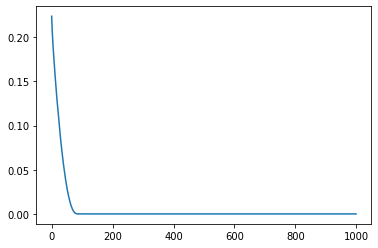

In [11]:
plt.plot(hist.history['loss'])

In [13]:
model.predict(np.array([0]))
model.predict([0])

array([[0.3201412]], dtype=float32)

In [14]:
model.predict(np.array([0.01]))

array([[0.33814612]], dtype=float32)

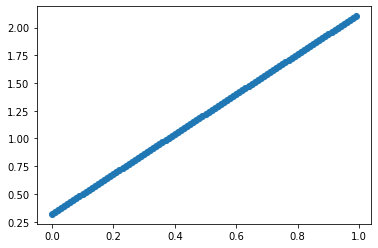

In [15]:
plt.scatter(x=scaled_data_c,y=scaled_data_d)

# 1.3노이즈가 있는 데이터로 실습

In [17]:
#평균이 0이고 표준편차가 0.1인 데이터 100
np.random.seed(707)
noise=np.array(np.random.normal(0,0.1,100))
noised_scaled_data_d=noise+scaled_data_d

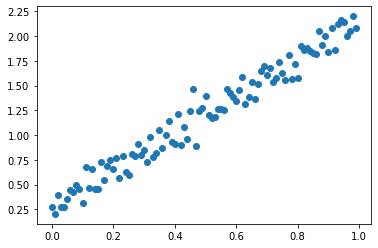

In [18]:
plt.scatter(x=scaled_data_c,y=noised_scaled_data_d)

In [20]:
#3.모델 구성
model2=Sequential()
model2.add(Dense(1,input_dim=1))
#4.학습과정 설정
model2.compile(loss="mse",optimizer="rmsprop",metrics=["mae"])
# 손실함수 ,옵티마이저,평가지표
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
#5.학습시키기
hist2=model2.fit(scaled_data_c,noised_scaled_data_d,epochs=1000,verbose=2)

Epoch 1/1000
4/4 - 0s - loss: 0.5993 - mae: 0.7219
Epoch 2/1000
4/4 - 0s - loss: 0.5819 - mae: 0.7105
Epoch 3/1000
4/4 - 0s - loss: 0.5710 - mae: 0.7033
Epoch 4/1000
4/4 - 0s - loss: 0.5610 - mae: 0.6966
Epoch 5/1000
4/4 - 0s - loss: 0.5504 - mae: 0.6895
Epoch 6/1000
4/4 - 0s - loss: 0.5414 - mae: 0.6834
Epoch 7/1000
4/4 - 0s - loss: 0.5319 - mae: 0.6768
Epoch 8/1000
4/4 - 0s - loss: 0.5234 - mae: 0.6710
Epoch 9/1000
4/4 - 0s - loss: 0.5145 - mae: 0.6646
Epoch 10/1000
4/4 - 0s - loss: 0.5068 - mae: 0.6593
Epoch 11/1000
4/4 - 0s - loss: 0.4985 - mae: 0.6535
Epoch 12/1000
4/4 - 0s - loss: 0.4899 - mae: 0.6473
Epoch 13/1000
4/4 - 0s - loss: 0.4820 - mae: 0.6415
Epoch 14/1000
4/4 - 0s - loss: 0.4738 - mae: 0.6356
Epoch 15/1000
4/4 - 0s - loss: 0.4655 - mae: 0.6294
Epoch 16/1000
4/4 - 0s - loss: 0.4573 - mae: 0.6234
Epoch 17/1000
4/4 - 0s - loss: 0.4498 - mae: 0.6176
Epoch 18/1000
4/4 - 0s - loss: 0.4426 - mae: 0.6122
Epoch 19/1000
4/4 - 0s - loss: 0.4350 - mae: 0.6064
Epoch 20/1000
4/4 - 0

Epoch 158/1000
4/4 - 0s - loss: 0.0203 - mae: 0.1186
Epoch 159/1000
4/4 - 0s - loss: 0.0202 - mae: 0.1181
Epoch 160/1000
4/4 - 0s - loss: 0.0200 - mae: 0.1176
Epoch 161/1000
4/4 - 0s - loss: 0.0199 - mae: 0.1173
Epoch 162/1000
4/4 - 0s - loss: 0.0197 - mae: 0.1167
Epoch 163/1000
4/4 - 0s - loss: 0.0195 - mae: 0.1163
Epoch 164/1000
4/4 - 0s - loss: 0.0194 - mae: 0.1160
Epoch 165/1000
4/4 - 0s - loss: 0.0193 - mae: 0.1157
Epoch 166/1000
4/4 - 0s - loss: 0.0192 - mae: 0.1153
Epoch 167/1000
4/4 - 0s - loss: 0.0190 - mae: 0.1149
Epoch 168/1000
4/4 - 0s - loss: 0.0189 - mae: 0.1146
Epoch 169/1000
4/4 - 0s - loss: 0.0188 - mae: 0.1142
Epoch 170/1000
4/4 - 0s - loss: 0.0186 - mae: 0.1139
Epoch 171/1000
4/4 - 0s - loss: 0.0185 - mae: 0.1134
Epoch 172/1000
4/4 - 0s - loss: 0.0184 - mae: 0.1131
Epoch 173/1000
4/4 - 0s - loss: 0.0182 - mae: 0.1126
Epoch 174/1000
4/4 - 0s - loss: 0.0181 - mae: 0.1123
Epoch 175/1000
4/4 - 0s - loss: 0.0180 - mae: 0.1120
Epoch 176/1000
4/4 - 0s - loss: 0.0179 - mae: 

Epoch 313/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0885
Epoch 314/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0885
Epoch 315/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0885
Epoch 316/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0885
Epoch 317/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0883
Epoch 318/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0883
Epoch 319/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0882
Epoch 320/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0883
Epoch 321/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0883
Epoch 322/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0881
Epoch 323/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0881
Epoch 324/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0883
Epoch 325/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0881
Epoch 326/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0881
Epoch 327/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0881
Epoch 328/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0881
Epoch 329/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0882
Epoch 330/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0882
Epoch 331/1000
4/4 - 0s - loss: 0.0111 - mae: 

Epoch 468/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 469/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 470/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 471/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 472/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 473/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 474/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 475/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 476/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 477/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 478/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 479/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 480/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 481/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 482/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 483/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 484/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 485/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 486/1000
4/4 - 0s - loss: 0.0110 - mae: 

Epoch 623/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 624/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 625/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880
Epoch 626/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 627/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 628/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 629/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 630/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 631/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 632/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 633/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 634/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 635/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 636/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 637/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 638/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 639/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 640/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 641/1000
4/4 - 0s - loss: 0.0110 - mae: 

Epoch 778/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 779/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 780/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 781/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 782/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 783/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 784/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 785/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 786/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 787/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 788/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 789/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 790/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 791/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877
Epoch 792/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 793/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 794/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 795/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 796/1000
4/4 - 0s - loss: 0.0110 - mae: 

Epoch 933/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 934/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 935/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 936/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879
Epoch 937/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 938/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 939/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 940/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 941/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 942/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 943/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 944/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 945/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 946/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 947/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 948/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878
Epoch 949/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 950/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877
Epoch 951/1000
4/4 - 0s - loss: 0.0110 - mae: 

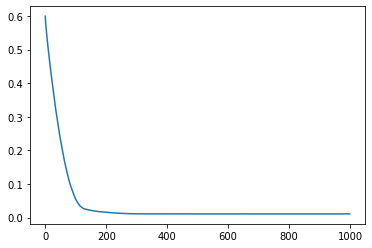

In [22]:
plt.plot(hist2.history["loss"])